In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='white',palette='husl')

In [100]:
data = pd.read_csv("Master's Classification Output.csv",index_col='Participant')

In [101]:
data.head()

,Correct_acc,Incorrect_acc,Correct_ev,Incorrect_ev,Age,Chance
Participant,,,,,,
1,0.736800,0.713875,0.929434,0.924349,1,0.521328
3,0.757576,0.700342,0.891895,0.896705,1,0.544871
4,0.789348,0.545098,0.882844,0.869046,1,0.516106
5,0.818259,0.884259,0.935486,0.891292,1,0.476852
6,0.839686,0.783767,0.912502,0.928449,1,0.495370


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 140
Data columns (total 6 columns):
Correct_acc      50 non-null float64
Incorrect_acc    50 non-null float64
Correct_ev       50 non-null float64
Incorrect_ev     50 non-null float64
Age              50 non-null int64
Chance           50 non-null float64
dtypes: float64(5), int64(1)
memory usage: 2.7 KB


In [103]:
from scipy import stats
from scipy.stats import ttest_rel,ttest_1samp,ttest_ind

# Classifier Accuracy

Below is the distribution of classifier accuracy values. The values range from 50%-95% with the mean around 70%. A wide spread is to be expected, some brains are noisier than others so the classifier will have a harder time decoding some brains.

Mean Classifier Accuracy = 0.70318515667


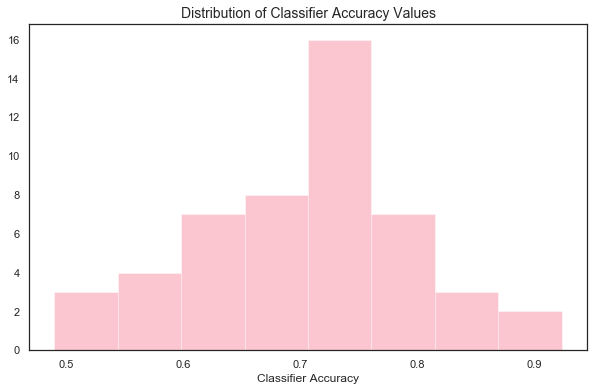

In [104]:
data['Acc'] = ((data['Correct_acc'] + data['Incorrect_acc'])/2)
plt.figure(figsize=(10,6))
sns.distplot(data['Acc'],kde=False)
plt.title('Distribution of Classifier Accuracy Values',fontsize=14)
plt.xlabel('Classifier Accuracy')
print 'Mean Classifier Accuracy =', data['Acc'].mean()

Before we can interpret the results, we need to make sure the classifier is performing above chance. An independent samples t-test between the classifier accuracy, regardless of memory performance, and chance classifier performace was conducted. *p* < .05, confirming we can decode perceptual category-level information.  

In [105]:
ttest_ind(data['Acc'],data['Chance'],equal_var=False)

Ttest_indResult(statistic=12.677513236544982, pvalue=5.070967793801483e-20)

In the figure below, we can see that the classifier performs slightly better when participants later correctly remember if the object was paired with a face or scene than when they do not.

Text(0.5,1,'Classifier Accuracy by Memory Performance')

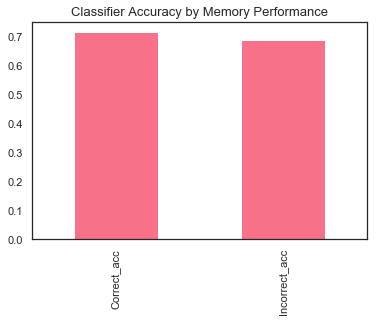

In [106]:
data[['Correct_acc','Incorrect_acc']].mean().plot(kind='bar')
plt.title('Classifier Accuracy by Memory Performance',fontsize=13)

We can test this with a paired t-test. However, we first need to check that the assumptions of the paired t-test are met. One assumption is that there are no significant outliers. The boxplot below shows that this assumption has been met.

Text(0.5,1,'Classifier Accuracy Boxplot')

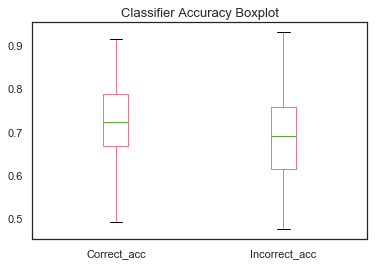

In [107]:
data[['Correct_acc','Incorrect_acc']].plot(kind='box')
plt.title('Classifier Accuracy Boxplot',fontsize=13)

Another assumption is that the variables are normally distributed. This is checked by taking the difference between the two variables rather than checking the raw values. The histogram below shows that they are normally distributed.

Text(0.5,1,'Correct-Incorrect Classifier Accuracy Histogram')

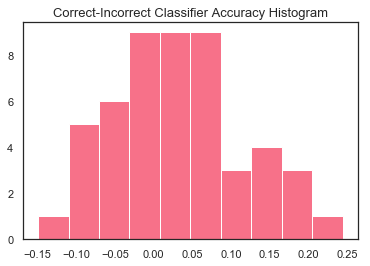

In [108]:
data['Acc_Diff'] = data['Correct_acc'] - data['Incorrect_acc']
data['Acc_Diff'].hist(grid=False)
plt.title('Correct-Incorrect Classifier Accuracy Histogram',fontsize=13)

Since the assumptions are met, we can run the paired t-test. *p* < .05 meaning classifier accuracy is greater when participants correctly remember if the object was paired with a face or scene than when they forget.

In [109]:
ttest_rel(data['Correct_acc'],data['Incorrect_acc'])

Ttest_relResult(statistic=2.3569335926433994, pvalue=0.022467053217720082)

# Classifier Evidence

In the figure below there does not appear to be a difference in evidence when the participant correctly remembers if the object was paired with a face or scene compared to when they forget.

Text(0.5,1,'Classifier Evidence by Memory Performance')

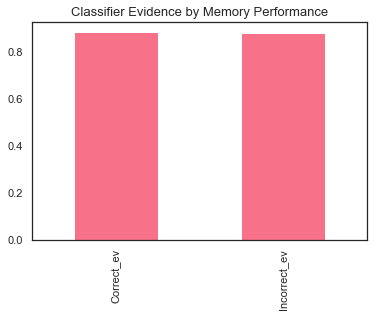

In [110]:
data[['Correct_ev','Incorrect_ev']].mean().plot(kind='bar')
plt.title('Classifier Evidence by Memory Performance',fontsize=13)

However, we still need to test this using a paired t-test to be sure. Again, before we do so, we need to check that the assumptions of the paired t-test are met. First is that there are no significant outliers. The boxplot below shows that there are a few significant outliers.

Text(0.5,1,'Classifier Evidence Boxplot')

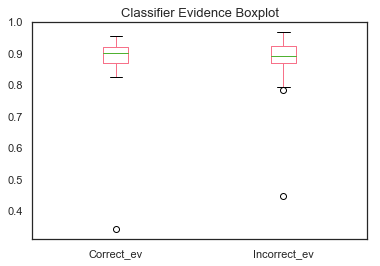

In [111]:
data[['Correct_ev','Incorrect_ev']].plot(kind='box')
plt.title('Classifier Evidence Boxplot',fontsize=13)

We then need to make sure that variables are normally distributed. The histogram below shows that they are normally distributed.

Text(0.5,1,'Correct-Incorrect Classifier Evidence Histogram')

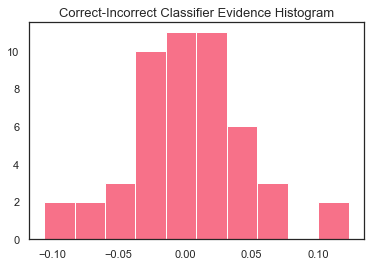

In [112]:
data['Ev_Diff'] = data['Correct_ev'] - data['Incorrect_ev']
data['Ev_Diff'].hist(grid=False)
plt.title('Correct-Incorrect Classifier Evidence Histogram',fontsize=13)

Because the assumption of no outliers was not met, we cannot use a paired t-test. Instead I'm going to use the nonparametric Wilcoxon Sign-Ranked Test. *p*-value > .05 meaning classifier evidence does not differ between when a participant remembers and forgets if the object was paired with a face or scene.

In [113]:
stats.wilcoxon(data['Ev_Diff'])

WilcoxonResult(statistic=597.0, pvalue=0.6958284390633942)